In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)

<font color='red'>

# Machine Learning: Unsupervised learning (Part 2)


# How can dimensionality affect the clustering results?##

## How to visualize the data in 60-dimensional space?##

## 2.4 Dimensionality reduction

Let us consider a clustering  of handwritten digits data.  Let us consider the [letter dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits). Python source code: [plot_kmeans_digits.py](http://scikit-learn.org/stable/_downloads/plot_kmeans_digits.py).
        

In [2]:
from IPython.display import HTML
HTML('<iframe src=http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits  width=900 height=500></iframe>')

/Users/petia/anaconda/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**How to visualize the $R^{64}$ feature space?**

We need a dimensionality reduction technique to:

+ visualize the data,

+ remove non-relevant information (redundancy), 

+ speed up the clustering algorithms.

In [3]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.datasets import load_digits 
np.random.seed(42)

# Load the digit data
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [4]:
data = scale(digits.data)  #Standardize a dataset along any axis, 
                           #Center to the mean and component wise scale to unit variance.

print(digits.target[1:35])  # data labels

[1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6]


In [5]:
%matplotlib inline
import pylab as pl        #pylab combines pyplot with numpy into a single namespace. 
                          #For more information, look at: http://wiki.scipy.org/PyLab
pl.gray()                 #defines the gray colormap to display images


<Figure size 432x288 with 0 Axes>

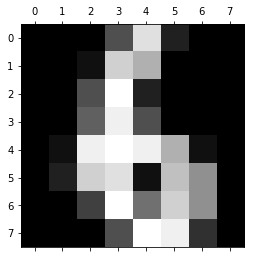

In [6]:
pl.matshow(digits.images[34]) 
plt.show() 

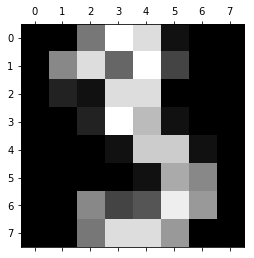

In [7]:
pl.matshow(digits.images[3]) 
plt.show() 

In [8]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target
sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d" % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [9]:
import pylab as pl
from matplotlib import pyplot as plt #Provides a MATLAB-like plotting framework.
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

ones=data[labels==1]
fives=data[labels==5]

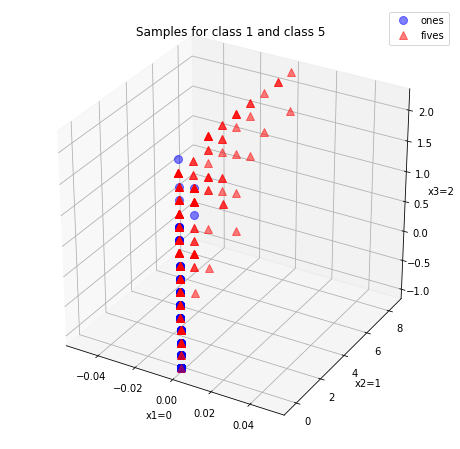

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
x1,x2,x3=0,1,2 #let's consider the first three features

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))

plt.show()
plt.figure()

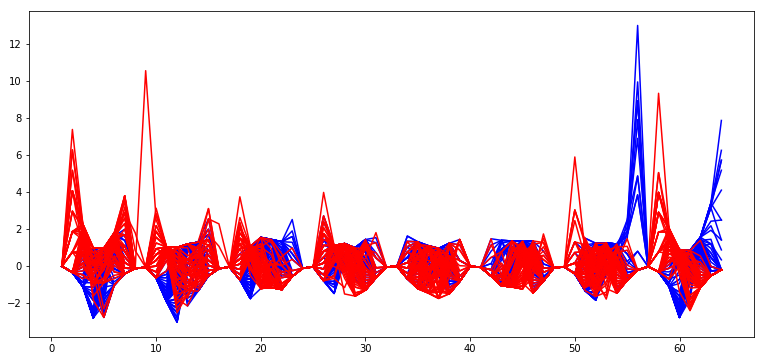

In [11]:
for i in range(ones.shape[1]):
    plt.plot(range(1,n_features+1), ones[i,:], c='b')
for i in range(fives.shape[1]):
    plt.plot(range(1,n_features+1), fives[i,:], c='r')

fig = plt.gcf()
fig.set_size_inches((13,6))

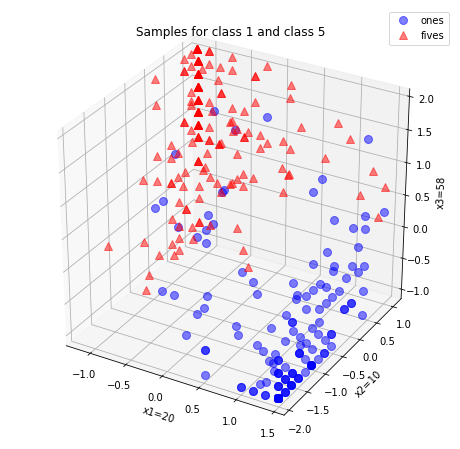

In [12]:
dif=abs(np.mean(fives,axis=0)-np.mean(ones,axis=0))
ind=np.argsort(dif) # look for the biggest difference
ind=ind[::-1]   # sort and reverse the order
x1,x2,x3=ind[0:3] # consider the most discriminant features

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(fives[:, x1], fives[:, x2], fives[:, x3], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5')
ax.legend(loc='upper right')
ax.set_xlabel('x1='+str(x1))
ax.set_ylabel('x2='+str(x2))
ax.set_zlabel('x3='+str(x3))
plt.show()

Which features (dimensions) to choose?

**Principal Component Analysis (PCA)** is a statistical procedure that decomposes a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance. 

PCA uses an *orthogonal transformation* to convert a set of observations of possibly correlated variables into a set of values of *linearly uncorrelated* variables called **principal components**. 

The **number** of principal components is less than or equal to the number of original variables. 

This transformation is defined in such a way that the *first principal component* has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to (i.e., uncorrelated with) the preceding components. 

**How to obtain it?:** The principal components are obtained as the **eigenvectors of the covariance matrix**, hence are *orthogonal*. 

In scikit-learn, PCA is implemented as a transformer object that learns $n$ components in its *fit* method, and can be used on new data to project it on these components.

In [13]:
# Do the PCA decomposition!
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
print(np.concatenate((ones,fives)).shape)

newdataPCA=pca.fit_transform(np.concatenate((ones,fives))) #concatenates vectors row by row



(364, 64)


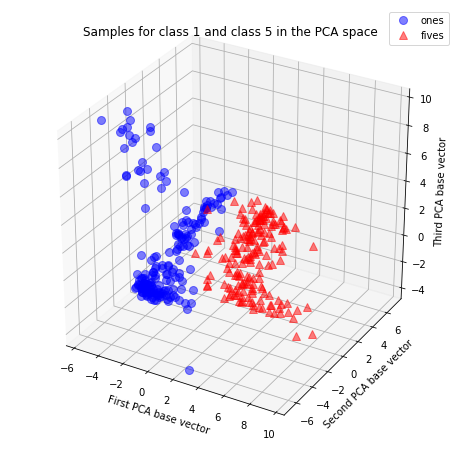

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

ax.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1],\
    newdataPCA[1:ones.shape[0], 2], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
ax.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1],\
    newdataPCA[ones.shape[0]:, 2], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
ax.legend(loc='upper right')
ax.set_xlabel('First PCA base vector')
ax.set_ylabel('Second PCA base vector')
ax.set_zlabel('Third PCA base vector')
plt.show()

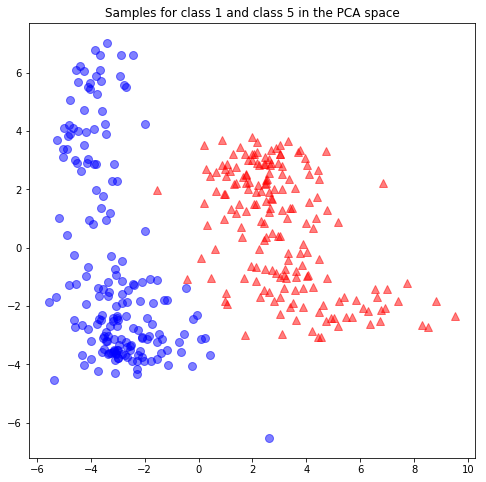

In [15]:
fig = plt.figure(figsize=(8,8))
plt.rcParams['legend.fontsize'] = 10

plt.plot(newdataPCA[1:ones.shape[0], 0], newdataPCA[1:ones.shape[0], 1], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
plt.plot(newdataPCA[ones.shape[0]:, 0], newdataPCA[ones.shape[0]:, 1], '^', markersize=8, alpha=0.5, color='red', label='fives')

plt.title('Samples for class 1 and class 5 in the PCA space')
plt.show()

### Comparison of performance of K-means with different strategies

Let's go back to compare the K-means performance using various strategies in terms of runtime and quality of the results. As the groundtruth is known here, we also apply different cluster quality metrics to judge the goodness of the fit of the cluster labels to the groundtruth.

In [16]:
estimator=KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
estimator.fit(data)

print ('Silhouette score is: %.3f' % metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean'))

Silhouette score is: 0.144


In [17]:
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))
    

In [18]:
print(79 * '_')
print('% 9s' % 'initial-n    time  inertia    homo   compl  v-meas    silhouette')

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
                              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
                              name="random", data=data)

                    # In this case, the seeding of the centers is deterministic, hence we run the
                                        # k-means algorithm only once with n_init=1.
pca = PCA(n_components=n_digits).fit(data)

bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                              name="PCA-based", data=data)
print(79 * '_')

_______________________________________________________________________________
initial-n    time  inertia    homo   compl  v-meas    silhouette
k-means++   0.26s    69661   0.670   0.709   0.689    0.129
   random   0.15s    69430   0.599   0.647   0.622    0.158
PCA-based   0.03s    70803   0.670   0.697   0.683    0.146
_______________________________________________________________________________


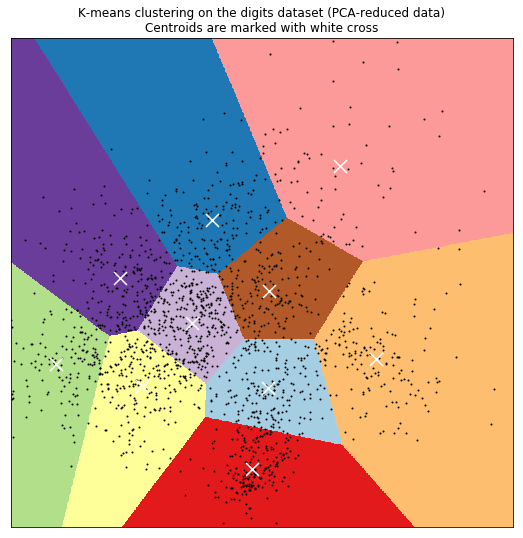

In [19]:
###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

                    # Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02             # point in the mesh [x_min, m_max]x[y_min, y_max].

        # Plot the decision boundary. For that, we will assign a color to each point
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
Z = Z.reshape(xx.shape)

#visualize
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                       cmap=plt.cm.Paired,aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.gcf()
fig.set_size_inches((9,9))

In [43]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

import numpy as np
np.set_printoptions(linewidth=105)